In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from PIL import Image
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [18]:
labels = pd.read_csv('Dataset/labels.csv')
# convert region_attributes to simple string. i.e. {""Bus"":""""} to Bus by using substring
labels['region_attributes'] = labels['region_attributes'].str[2:-5]


# train test split
train, test = train_test_split(labels, test_size=0.2, stratify=labels['region_attributes'], random_state=42)

# load images
train_images = []
for i in range (0, len(train)):
    img = Image.open('Dataset/UsedImages/' + train.iloc[i, 0])
    img = img.resize((256, 256))
    img = np.array(img)
    img = img / 255
    train_images.append(img)



test_images = []
for i in range (0, len(test)):
    img = Image.open('Dataset/UsedImages/' + test.iloc[i, 0])
    img = img.resize((256, 256))
    img = np.array(img)
    img = img / 255
    test_images.append(img)

train_images = np.array(train_images)
test_images = np.array(test_images)


In [19]:
print(train['region_attributes'].value_counts())
print(test['region_attributes'].value_counts())

region_attributes
Bus    20
Car    20
Name: count, dtype: int64
region_attributes
Bus    5
Car    5
Name: count, dtype: int64


In [20]:
# create r-ccn model
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(256, 256, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

In [21]:
# convert labels to numerical format
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train['region_attributes'])

# compile and fit the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=100)

Epoch 1/100
2/2 [==============================] - 4s 384ms/step - loss: 4.8239 - accuracy: 0.5500
Epoch 2/100
2/2 [==============================] - 2s 593ms/step - loss: 3.4197 - accuracy: 0.8000
Epoch 3/100
2/2 [==============================] - 2s 525ms/step - loss: 9.5028 - accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 2s 507ms/step - loss: 1.2032 - accuracy: 0.4500
Epoch 5/100
2/2 [==============================] - 2s 592ms/step - loss: 1.1748 - accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 2s 425ms/step - loss: 0.7077 - accuracy: 0.5750
Epoch 7/100
2/2 [==============================] - 2s 564ms/step - loss: 0.4272 - accuracy: 0.9000
Epoch 8/100
2/2 [==============================] - 2s 565ms/step - loss: 0.3485 - accuracy: 0.9750
Epoch 9/100
2/2 [==============================] - 2s 389ms/step - loss: 0.2541 - accuracy: 0.9250
Epoch 10/100
2/2 [==============================] - 2s 666ms/step - loss: 0.1473 - accuracy: 0.9250
Epoch 11/

In [22]:
# evaluate the model
test_labels = label_encoder.transform(test['region_attributes'])
model.evaluate(test_images, test_labels)

1/1 [==============================] - 1s 595ms/step - loss: 0.3307 - accuracy: 0.8000


[0.33067694306373596, 0.800000011920929]

In [23]:
# print confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis=1)
print(confusion_matrix(test_labels, predictions))
print(classification_report(test_labels, predictions))

1/1 [==============================] - 0s 241ms/step
[[4 1]
 [1 4]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



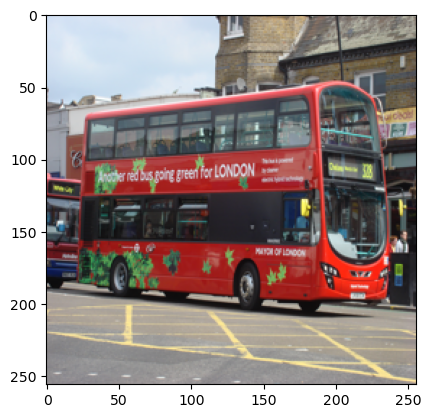

['Bus']
['Car']
-----------------


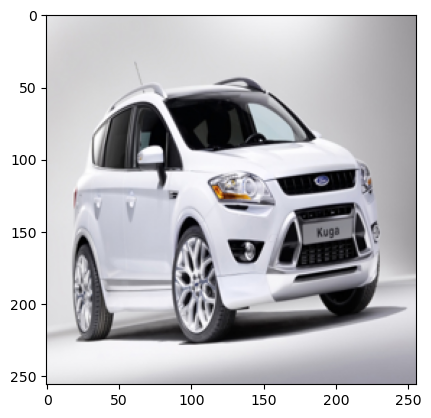

['Car']
['Bus']
-----------------


In [24]:
# show predictions
for i in range(0, 10):
    if predictions[i] != test_labels[i]:
        plt.imshow(test_images[i])
        plt.show()
        print(label_encoder.inverse_transform([test_labels[i]]))
        print(label_encoder.inverse_transform([predictions[i]]))
        print('-----------------')

In [9]:
# use genetic algorithm to optimize hyperparameters
from tpot import TPOTClassifier

# Reshape images to 2-D arrays
train_images_reshaped = train_images.reshape(train_images.shape[0], -1)
test_images_reshaped = test_images.reshape(test_images.shape[0], -1)

# train tpot model
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)
tpot.fit(train_images_reshaped, train_labels) 

                                                                               
Generation 1 - Current best internal CV score: 0.7
                                                                               
Generation 2 - Current best internal CV score: 0.725
Optimization Progress:  52%|█████▏    | 62/120 [47:06<54:30, 56.38s/pipeline]  

  File "c:\Users\wesse\anaconda3\envs\tensorenv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\wesse\anaconda3\envs\tensorenv\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\wesse\anaconda3\envs\tensorenv\lib\subprocess.py", line 966, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\wesse\anaconda3\envs\tensorenv\lib\subprocess.py", line 1435, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


                                                                                 
Generation 3 - Current best internal CV score: 0.725
                                                                                
Generation 4 - Current best internal CV score: 0.725
                                                                                
Generation 5 - Current best internal CV score: 0.725
                                                                                
Best pipeline: SGDClassifier(input_matrix, alpha=0.001, eta0=0.1, fit_intercept=True, l1_ratio=1.0, learning_rate=constant, loss=modified_huber, penalty=elasticnet, power_t=0.1)


TPOTClassifier(generations=5, population_size=20, verbosity=2)

In [12]:
# evaluate the model
print(tpot.score(test_images_reshaped, test_labels))
print('-----------------')
# print confusion matrix and classification report
predictions = tpot.predict(test_images_reshaped)
print(confusion_matrix(test_labels, predictions))
print(classification_report(test_labels, predictions))

0.8
-----------------
[[4 1]
 [1 4]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



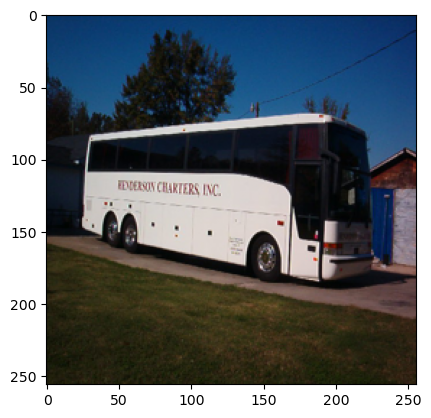

['Bus']
['Car']
-----------------


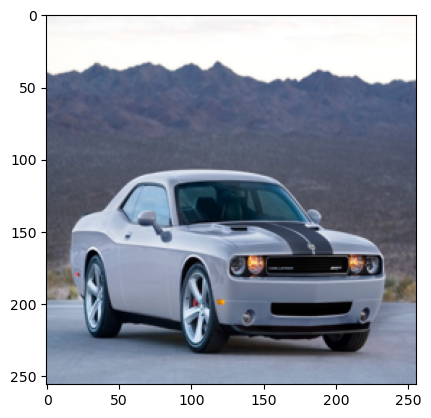

['Car']
['Bus']
-----------------


In [15]:
# show incorrect predictions
for i in range(0, 10):
    if test_labels[i] != predictions[i]:
        plt.imshow(test_images[i])
        plt.show()
        print(label_encoder.inverse_transform([test_labels[i]]))
        print(label_encoder.inverse_transform([predictions[i]]))
        print('-----------------')